In [11]:
# Load a file 
from Bio import SeqIO
sequence_recored = SeqIO.parse("upstream250.fasta", "fasta")
 


In [20]:
from Bio.Seq import Seq
from Bio.SeqUtils import nt_search

# Define the main sequence and the subsequence to count
main_sequence = Seq("CGCGATACGTTACATACATGATAGACCGCGCGCGATCATATCGCGATTATC")
subsequence = "CGCG"

# Use nt_search to find all occurrences (including overlapping)
search_result = nt_search(str(main_sequence), subsequence)

# The first element of the result is the search pattern, so we exclude it
overlapping_count = len(search_result) - 1

print(f"The subsequence '{subsequence}' appears:")
print(f"  {main_sequence.count(subsequence)} times (non-overlapping)")
print(f"  {overlapping_count} times (overlapping)")
print(f"Positions: {search_result[1:]}")

The subsequence 'CGCG' appears:
  4 times (non-overlapping)
  5 times (overlapping)
Positions: [0, 26, 28, 30, 41]


In [21]:
from Bio.Seq import Seq
from Bio.SeqUtils import nt_search

# Define the Text and Pattern
text = Seq("ATGACTTCGCTGTTACGCGC")
pattern = "CGC"

# Use nt_search to find all occurrences (including overlapping)
search_result = nt_search(str(text), pattern)

# The first element of the result is the search pattern, so we exclude it
positions = search_result[1:]

# Print the positions (0-based indexing)
print("Starting positions:", " ".join(map(str, positions)))

Starting positions: 7 15 17


In [22]:
from Bio.Seq import Seq

def hamming_distance(seq1, seq2):
    """Calculate the Hamming distance between two sequences."""
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must be of equal length")
    return sum(ch1 != ch2 for ch1, ch2 in zip(seq1, seq2))

# Define the two sequences
seq1 = Seq("TGACCCGTTATGCTCGAGTTCGGTCAGAGCGTCATTGCGAGTAGTCGTTTGCTTTCTCAAACTCC")
seq2 = Seq("GAGCGATTAAGCGTGACAGCCCCAGGGAACCCACAAAACGTGATCGCAGTCCATCCGATCATACA")

# Compute Hamming distance
distance = hamming_distance(seq1, seq2)

print(f"Sequence 1: {seq1}")
print(f"Sequence 2: {seq2}")
print(f"Hamming distance: {distance}")

Sequence 1: TGACCCGTTATGCTCGAGTTCGGTCAGAGCGTCATTGCGAGTAGTCGTTTGCTTTCTCAAACTCC
Sequence 2: GAGCGATTAAGCGTGACAGCCCCAGGGAACCCACAAAACGTGATCGCAGTCCATCCGATCATACA
Hamming distance: 50


Sequence: ATGCATGCATGCATGCATGCATGC
GC Skew: [0.0, 0.2, 0.0, -0.2, 0.0, 0.2, 0.0, -0.2, 0.0, 0.2, 0.0, -0.2, 0.0, 0.2, 0.0]


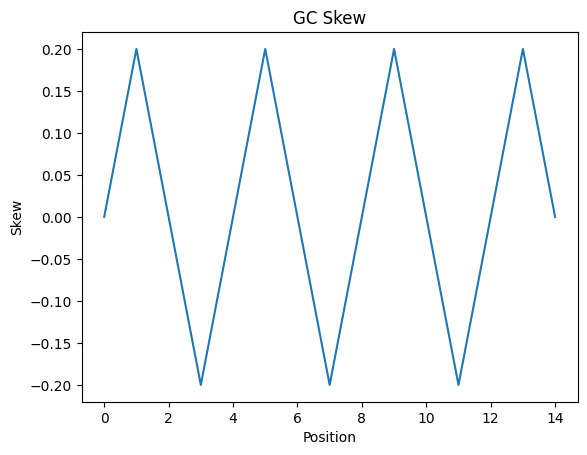

In [3]:
from Bio.Seq import Seq

def calculate_gc_skew(sequence, window_size=1000):
    """Calculate GC skew over a sliding window."""
    skew = []
    for i in range(0, len(sequence) - window_size + 1):
        window = sequence[i:i+window_size]
        g_count = window.count('G')
        c_count = window.count('C')
        if g_count + c_count == 0:
            skew.append(0)
        else:
            skew.append((g_count - c_count) / (g_count + c_count))
    return skew

# Example usage
sequence = Seq("ATGCATGCATGCATGCATGCATGC")
gc_skew = calculate_gc_skew(sequence, window_size=10)

print("Sequence:", sequence)
print("GC Skew:", gc_skew)

# If you want to plot the skew
import matplotlib.pyplot as plt

plt.plot(gc_skew)
plt.title("GC Skew")
plt.xlabel("Position")
plt.ylabel("Skew")
plt.show()

In [2]:
gc_skew

[1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 1.0]

In [29]:
from Bio.SeqUtils import GC_skew
from Bio.SeqUtils import xGC_skew

# Example sequence
sequence = "GATACACTTCCCGAGTAGGTACTG"
sequence = Seq(sequence)
# Calculate skew (returns two lists: the skew for 'G' and 'C' bases)
xGC_skew(sequence, window=10)


In [34]:
from Bio.SeqUtils import xGC_skew
from Bio.Seq import Seq
import matplotlib.pyplot as plt

# Example sequence
sequence = Seq("GATACACTTCCCGAGTAGGTACTG")

# This will plot the GC skew
gc_skew = GC_skew(sequence, window=1)

# Display the plot


In [37]:
import numpy as np

cumulative_sum = np.cumsum(gc_skew).tolist()
cumulative_sum
# Find the index of the minimum value in the cumulative sum
min_index = cumulative_sum.index(min(cumulative_sum))

print(f"The index of the minimum value in the cumulative sum is: {min_index}")


The index of the minimum value in the cumulative sum is: 11


: 

In [1]:
from Bio.Seq import Seq
from Bio.SeqUtils import nt_search

main_sequence = Seq("CGTGACAGTGTATGGGCATCTTT")
pattern = "TGT"

search_result = nt_search(str(main_sequence), pattern)
count = len(search_result) - 1

print(f"The pattern '{pattern}' appears {count} time(s) in the sequence.")
print(f"Positions: {search_result[1:]}")

The pattern 'TGT' appears 1 time(s) in the sequence.
Positions: [8]


In [3]:
from itertools import combinations, product

def d_neighborhood(pattern, d):
    nucleotides = 'ACGT'
    k = len(pattern)
    neighborhood = set()

    for i in range(d + 1):
        for positions in combinations(range(k), i):
            for replacements in product(nucleotides, repeat=i):
                new_pattern = list(pattern)
                for pos, nuc in zip(positions, replacements):
                    new_pattern[pos] = nuc
                neighborhood.add(''.join(new_pattern))

    return neighborhood

pattern = "ACGT"
d = 3
neighborhood = d_neighborhood(pattern, d)
print(f"The number of 4-mers in the 3-neighborhood of {pattern} is: {len(neighborhood)}")

The number of 4-mers in the 3-neighborhood of ACGT is: 175


In [4]:
from Bio.Seq import Seq
from Bio import motifs

def hamming_distance(s1, s2):
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

def total_distance(kmer, sequences):
    return sum(min(hamming_distance(kmer, seq[i:i+len(kmer)]) 
               for i in range(len(seq) - len(kmer) + 1)) for seq in sequences)

sequences = [
    "CTCGATGAGTAGGAAAGTAGTTTCACTGGGCGAACCACCCCGGCGCTAATCCTAGTGCCC",
    "GCAATCCTACCCGAGGCCACATATCAGTAGGAACTAGAACCACCACGGGTGGCTAGTTTC",
    "GGTGTTGAACCACGGGGTTAGTTTCATCTATTGTAGGAATCGGCTTCAAATCCTACACAG"
]

candidates = ["AACGCTG", "TCTGAAG", "AATCCTA", "GTCAGCG", "GTAGGAA", "GATGAGT"]

for candidate in candidates:
    distance = total_distance(candidate, sequences)
    print(f"{candidate}: {distance}")

AACGCTG: 9
TCTGAAG: 8
AATCCTA: 0
GTCAGCG: 9
GTAGGAA: 0
GATGAGT: 4


In [17]:
from Bio.Seq import Seq
from collections import Counter

# Define the sequence
sequence = Seq("CGGAGGACTCTAGGTAACGCTTATCAGGTCCATAGGACATTCA")

# Generate all 3-mers
three_mers = [str(sequence[i:i+3]) for i in range(len(sequence) - 2)]

# Count the occurrences of each 3-mer
mer_counts = Counter(three_mers)

# Find the most common 3-mer(s)
most_common = mer_counts.most_common(1)

print(f"The most frequent 3-mer(s) is/are:")
for mer, count in most_common:
    print(f"'{mer}' occurring {count} times")

# If you want to see all 3-mers and their counts:
print("\nAll 3-mers and their counts:")
for mer, count in mer_counts.items():
    print(f"'{mer}': {count}")

The most frequent 3-mer(s) is/are:
'AGG' occurring 4 times

All 3-mers and their counts:
'CGG': 1
'GGA': 3
'GAG': 1
'AGG': 4
'GAC': 2
'ACT': 1
'CTC': 1
'TCT': 1
'CTA': 1
'TAG': 2
'GGT': 2
'GTA': 1
'TAA': 1
'AAC': 1
'ACG': 1
'CGC': 1
'GCT': 1
'CTT': 1
'TTA': 1
'TAT': 1
'ATC': 1
'TCA': 2
'CAG': 1
'GTC': 1
'TCC': 1
'CCA': 1
'CAT': 2
'ATA': 1
'ACA': 1
'ATT': 1
'TTC': 1


In [18]:
from Bio.Seq import Seq

# create a sequence object
my_seq = Seq("GCTAGCT")

# get the reverse complement
reverse_complement = my_seq.reverse_complement()

print(f"Original sequence: {my_seq}")
print(f"Reverse complement: {reverse_complement}")

Original sequence: GCTAGCT
Reverse complement: AGCTAGC


In [5]:
from Bio.Seq import Seq

# create a sequence object
my_seq = Seq("CATGTAGACTAG")

# print out some details about it
print("seq %s is %i bases long" % (my_seq, len(my_seq)))
print("reverse complement is %s" % my_seq.reverse_complement())
print("protein translation is %s" % my_seq.translate())

seq CATGTAGACTAG is 12 bases long
reverse complement is CTAGTCTACATG
protein translation is HVD*
